### 1. 시작 연도부터 끝나는 연도년까지 대구 기온 데이터에서 특정 월의 최고 기온 및 최저 기온의 평균값을 구하고 그래프로 표현 하시오.
#### daegu_utf8.csv 파일 이용
#### 데이터 구조
#### ['날짜', '지점', '평균기온', '최저기온', '최고기온’]
#### [0] [1] [2] [3] [4]
####  화면에서 측정할 달을 입력받아서 진행
#### 해당 기간 동안 최고기온 평균값 및 최저기온 평균값 계산
##### - 최고기온 및 최저기온 데이터를 이용하여 입력된 달의 각각 평균값을 구함
##### - 문자열 형태의 ‘날짜’ 열의 데이터는 datetime으로 변경함:
#### 하나의 그래프 안에 2개의 꺾은선 그래프로 결과를 출력
##### - 마이너스 기호 출력 깨짐 방지
##### - 입력된 월을 이용하여 그래프의 타이틀 내용 변경
##### - 최고 온도는 빨간색, 최저 온도는 파란색으로 표시하고 각각 마커 및 legend를 표시
##### - 다른 운영체제에서도 동작할 수 있

In [1]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import platform
import matplotlib.font_manager as fm
import numpy as np

In [2]:
#파일 로딩
FILENAME = './daegu_utf8.csv'

# 파일 데이터 프레임 화
df = pd.read_csv(FILENAME)

In [3]:
# 데이터 프레임 보기
df

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
41445,2022-06-26,143,28.4,24.4,32.8
41446,2022-06-27,143,27.3,25.4,30.1
41447,2022-06-28,143,28.9,24.8,32.3
41448,2022-06-29,143,29.5,27.7,33.7


In [4]:
## 결측치 처리
### 결측치 확인
df.isnull().sum()

날짜      0
지점      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64

In [5]:
## 결측치가 없으니 넘어감
## 중복값 확인
df.duplicated().sum()

0

In [6]:
# 시스템 설정
system_name = platform.system()
if system_name == 'Windows' :
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin' :
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

In [7]:
def monthGraph() :
    # '날짜' 컬럼이 object로 되어있음 datetime으로 수정
    df['날짜'] = df['날짜'].astype('datetime64')
    # 시작연도, 마지막 연도, 월의 입력값을 받는다
    year_s = int(input("시작 연도를 입력하세요: "))
    year_e = int(input("마지막 연도를 입력하세요: "))
    month = int(input("기온 변화를 측정할 달을 입력하세요: "))
    
    high_temp = [] # 최고기온 리스트
    low_temp = [] # 최저기온 리스트
    high_temp_mean = [] # 월별 최고기온의 평균값이 들어갈 리스트
    low_temp_mean = [] # 월별 최저기온의 평균값이 들어갈 리스트
    x_year = [] # 연도가 들어갈 리스트

    for i in range(0, len(df.index)):   # 전체 데이터를 살펴보면서
        date_string = df['날짜'][i]    # i번째 row의 '날짜' 컬럼을 date_string 변수로 설정
        if year_e>= date_string.year and date_string.year >= year_s: # date_strring의 연도 부분이 시작연도와 끝 연도 사이인 경우에만
            if date_string.month == month: # date_string의 month가 입력 받은 month 변수와 같을 때
                high_temp.append(float(df['최고기온'][i]))  # high_temp 에 해당 row의 최고기온 값 저장
                low_temp.append(float(df['최저기온'][i]))   # low_temp 에 해당 row의 최저기온 값 저장

                if date_string.month != df['날짜'][i + 1].month : # 만약 date_string의 month가 바뀐다면
                    high_temp_mean.append(round(np.mean(high_temp),1)) # high_temp의 리스트의 평균값을 구하고 round로 소수점 1점 값까지만 표현해서 high_temp_mean 리스트에 저장
                    low_temp_mean.append(round(np.mean(low_temp),1))  # low_temp의 리스트의 평균값을 구하고 round로 소수점 1점 값까지만 표현해서 low_temp_mean 리스트에 저장
                    high_temp = [] # high_temp 리스트 초기화
                    low_temp = []  # low_temp 리스트 초기화
                    x_year.append(date_string.year) # 해당 연도를 x_year 리스트에 추가

    plt.figure(figsize=(20,4)) # figure 사이즈 지정
    plt.plot(x_year, high_temp_mean, 'hotpink', marker='o', label='최고기온') # 최고기온 평균 리스트로 붉은색의 마커가 o인 최고기온 그래프 생성 
    plt.plot(x_year, low_temp_mean, 'royalblue', marker='s', label='최저기온') # 최저기온 평균 리스트로 푸른색의 마커가 ㅁ인 최저기온 그래프 생성

    plt.rcParams['axes.unicode_minus'] = False # - 기호 깨지는 것 방지
    plt.title("{0}년부터 {1}년까지 {2}월의 온도 변화 그래프".format(year_s, year_e, month), size = 16) # 타이틀 지정
    plt.legend(loc=2) # 라벨 표시
    plt.xticks(x_year)
    plt.show() # 그래프 출력
    print(f'{year_s} 년부터 {year_e} 년까지 {month} 월의 기온 변화\n\n{month} 월 최저기온 평균 :\n{low_temp_mean}\n{month} 월 최고기온 평균 :\n{high_temp_mean}')

시작 연도를 입력하세요: 2010
마지막 연도를 입력하세요: 2021
기온 변화를 측정할 달을 입력하세요: 12


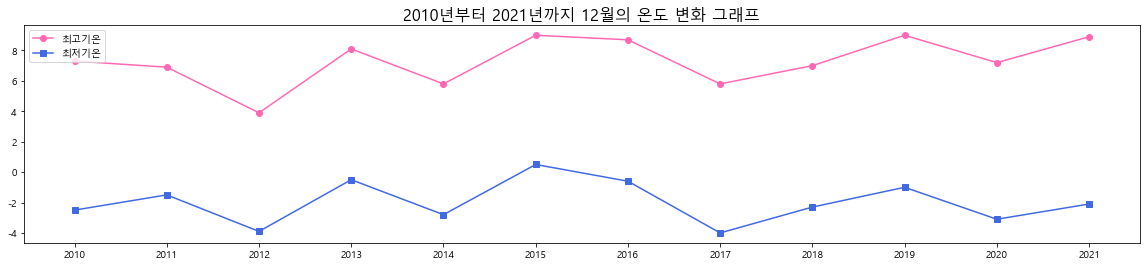

2010 년부터 2021 년까지 12 월의 기온 변화

12 월 최저기온 평균 :
[-2.5, -1.5, -3.9, -0.5, -2.8, 0.5, -0.6, -4.0, -2.3, -1.0, -3.1, -2.1]
12 월 최고기온 평균 :
[7.3, 6.9, 3.9, 8.1, 5.8, 9.0, 8.7, 5.8, 7.0, 9.0, 7.2, 8.9]


In [8]:
monthGraph()

시작 연도를 입력하세요: 2001
마지막 연도를 입력하세요: 2021
기온 변화를 측정할 달을 입력하세요: 8


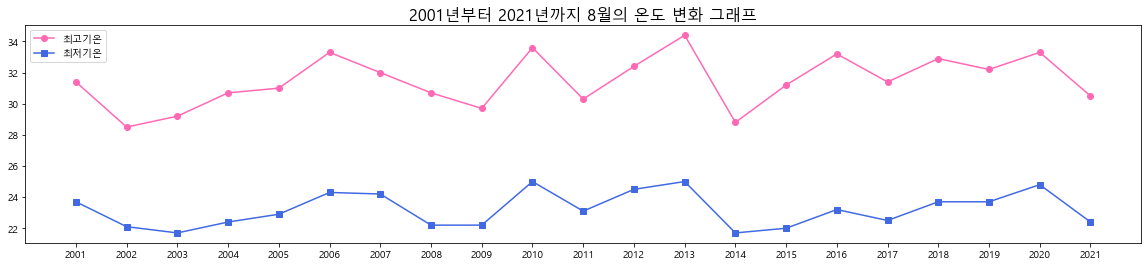

2001 년부터 2021 년까지 8 월의 기온 변화

8 월 최저기온 평균 :
[23.7, 22.1, 21.7, 22.4, 22.9, 24.3, 24.2, 22.2, 22.2, 25.0, 23.1, 24.5, 25.0, 21.7, 22.0, 23.2, 22.5, 23.7, 23.7, 24.8, 22.4]
8 월 최고기온 평균 :
[31.4, 28.5, 29.2, 30.7, 31.0, 33.3, 32.0, 30.7, 29.7, 33.6, 30.3, 32.4, 34.4, 28.8, 31.2, 33.2, 31.4, 32.9, 32.2, 33.3, 30.5]


In [9]:
monthGraph()